## Pracuj and Careerjet one day 'python scraping' visualizations

In [1]:
import pandas as pd
from datetime import datetime, date
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import math
import numpy as np

In [2]:
path = r'../scraping_results/all_data/'
df = pd.read_csv(path + 'all_data_2023-11-27.csv', index_col=0)
df.sample(5)

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
26,CloudAbility (ex Apptio) Engineer,careerjet.pl/jobad/pl8af46ea94c4a3acb7b33b1734...,Luxoft,Polska,NaN,The successful candidate will be working with:...,NaN,NaN,python,2023-11-25
19,Staff Frontend Developer @ LegalZoom,careerjet.pl/jobad/pl07550d23f96b8d7ca90e91845...,LegalZoom,"Kraków, małopolskie",NaN,What we are looking for: 8+ years of profes...,NaN,NaN,python,2023-11-27
71,Monitoring Specialist (m/f/d),https://www.pracuj.pl/praca/monitoring-special...,NaN,NaN,NaN,NaN,NaN,[],python,2023-11-27
333,Automation Test Engineer,https://www.pracuj.pl/praca/automation-test-en...,NaN,NaN,12 000–19 000 zł netto (+ VAT) / mies.,NaN,NaN,"['Cypress', 'Selenium', 'SQL', 'Python']",python,2023-11-25
1107,Senior Python Software Engineer,senior-python-software-engineer-innovecs-lubusz,Innovecs,NaN,15907.0 - 19486.0,NaN,2023-11-15,Python,python,2023-11-27


### Check the count of null values in each Column

In [3]:
null_count = df.isna().sum()
null_count = pd.DataFrame(null_count)
null_count = null_count.T
null_count

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
0,153,153,1122,3807,1116,3132,1557,540,0,0


### Analyzing the skills required

In [4]:
skills = df['skills']

#### Drop null values

In [5]:
skills_clean = skills.dropna()

In [6]:
len(skills_clean)

3807

In [7]:
skills_clean = pd.DataFrame(skills_clean, columns=['skills'])
skills_clean = skills_clean.reset_index(drop=True)
skills_clean.head()

,skills
0,"['Python', 'Apache Camel', 'DB', 'Java']"
1,"['Python', 'CI/CD', 'Apache Camel', 'DB', 'Jav..."
2,"['ETL', 'Python', 'SQL', 'AWS', 'PostgreSQL']"
3,"['C++', 'C#', 'Python', 'Git', 'Visual Studio']"
4,"['SQL', 'Node.js', 'Python', 'Git', 'Looker']"


In [8]:
# skills_split = skills_clean.skills.apply(pd.Series)
# skills_split[['skill1','skill2', 'rest']] = pd.DataFrame(skills_clean.skills.tolist())
# skills_split = pd.DataFrame(skills_clean.skills.tolist())
# print(skills_split.head())
# skills_split.rename(columns={0:'skill1', 1:'skill2',
#                                2:'skill3', 3:'skill4',
#                                4:'skill5', 5:'skill6'}, inplace=True)
# skills_split.head()
skills_string = skills_clean['skills'].str.split(',', expand=True)
# skills_string.apply(lambda x: re.sub('[a-zA-Z]+', '', x))
# skills_string = skills_string.replace(r'([a-zA-Z]*)', r'\1', regex=True)
skills_string = skills_string.replace(r'\[', r'', regex=True)
skills_string = skills_string.replace(r'\]', r'', regex=True)
skills_string = skills_string.replace(r"'", r'', regex=True)
skills_string.drop
skills_string.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Python,Apache Camel,DB,Java,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Python,CI/CD,Apache Camel,DB,Java,Git,Jenkins,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,ETL,Python,SQL,AWS,PostgreSQL,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,C++,C#,Python,Git,Visual Studio,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,SQL,Node.js,Python,Git,Looker,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### Split column cells into separate cells of strings

In [9]:
skills_string = skills_string.loc[:, :6]
skills_string.fillna("", inplace=True)
skills_string.head()

,0,1,2,3,4,5,6
0,Python,Apache Camel,DB,Java,,,
1,Python,CI/CD,Apache Camel,DB,Java,Git,Jenkins
2,ETL,Python,SQL,AWS,PostgreSQL,,
3,C++,C#,Python,Git,Visual Studio,,
4,SQL,Node.js,Python,Git,Looker,,


In [10]:
extra_words = ['']
stopwords_extra = STOPWORDS.update(['team', 'will', 'looking', 'join', 'client'])

### Get word count of skills by combining them into a single string (not an array) and using the wordcloud library

Text(0.5, 1.0, 'Skills word cloud [python]')

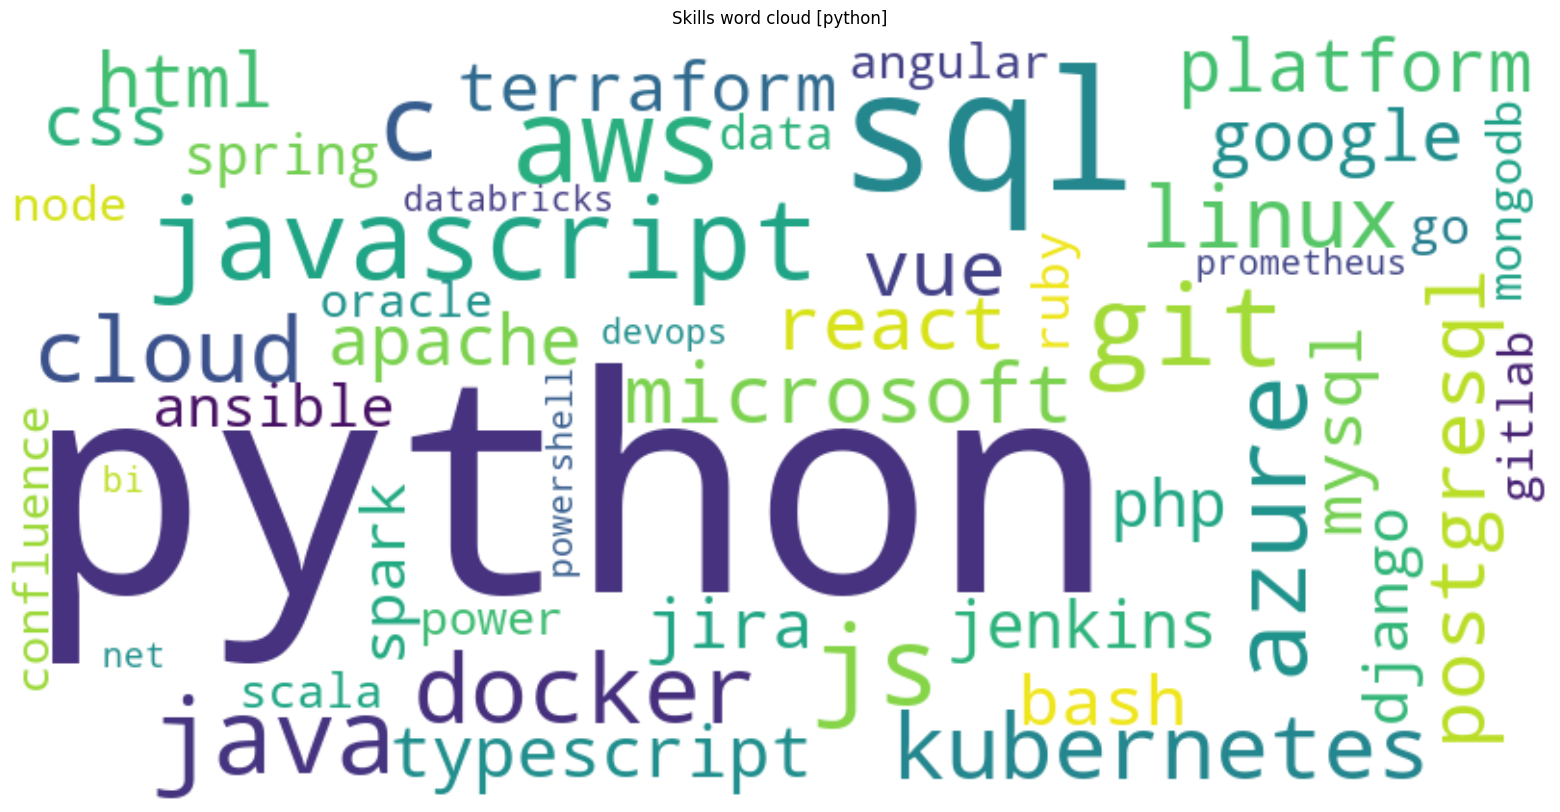

In [11]:
# skills_string['joined'] = skills_string[[0,1,2,3,4,5,6]].agg(', '.join, axis=1)
sum_string = ''
for column in skills_string.columns:
    sum_string += ' '.join(skills_string[column].str.lower())
# skills_string[0]
# skills_string.columns[0]
# skills_string[skills_string.columns[0]]
plt.figure(figsize=(20,10))
wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
              width=800, height=400, collocations=False)
wc.generate(sum_string)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Skills word cloud [python]')

Text(0.5, 1.0, 'skills frequency bar chart')

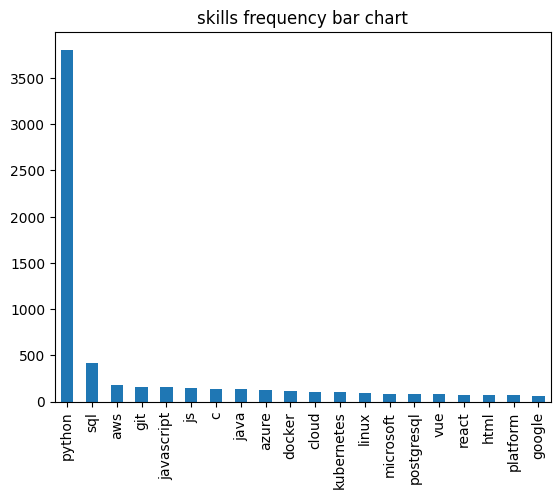

In [12]:
# freq_count_0 =  
# for col in skills_string.columns:
#     freq_count = skills_string[col].values_count()
# words_fc = pd.DataFrame(wc.words_)
words_fc = pd.Series(wc.words_)
words_fc =  np.ceil(words_fc * len(skills_clean))
words_fc[:20].plot.bar()
plt.title('skills frequency bar chart')

Text(0.5, 1.0, 'skills frequency pie chart')

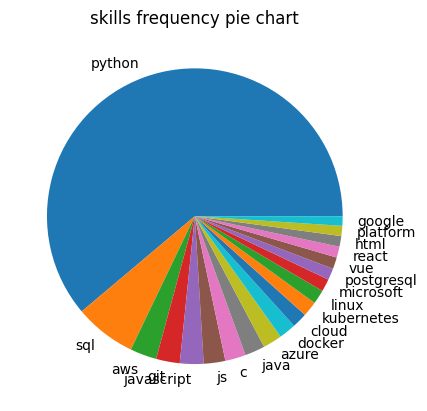

In [13]:
words_fc[:20].plot.pie()
plt.title('skills frequency pie chart')

In [14]:
help(wc)

Help on WordCloud in module wordcloud.wordcloud object:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defau

### Analyzing the job titles

Text(0.5, 1.0, 'Title word cloud')

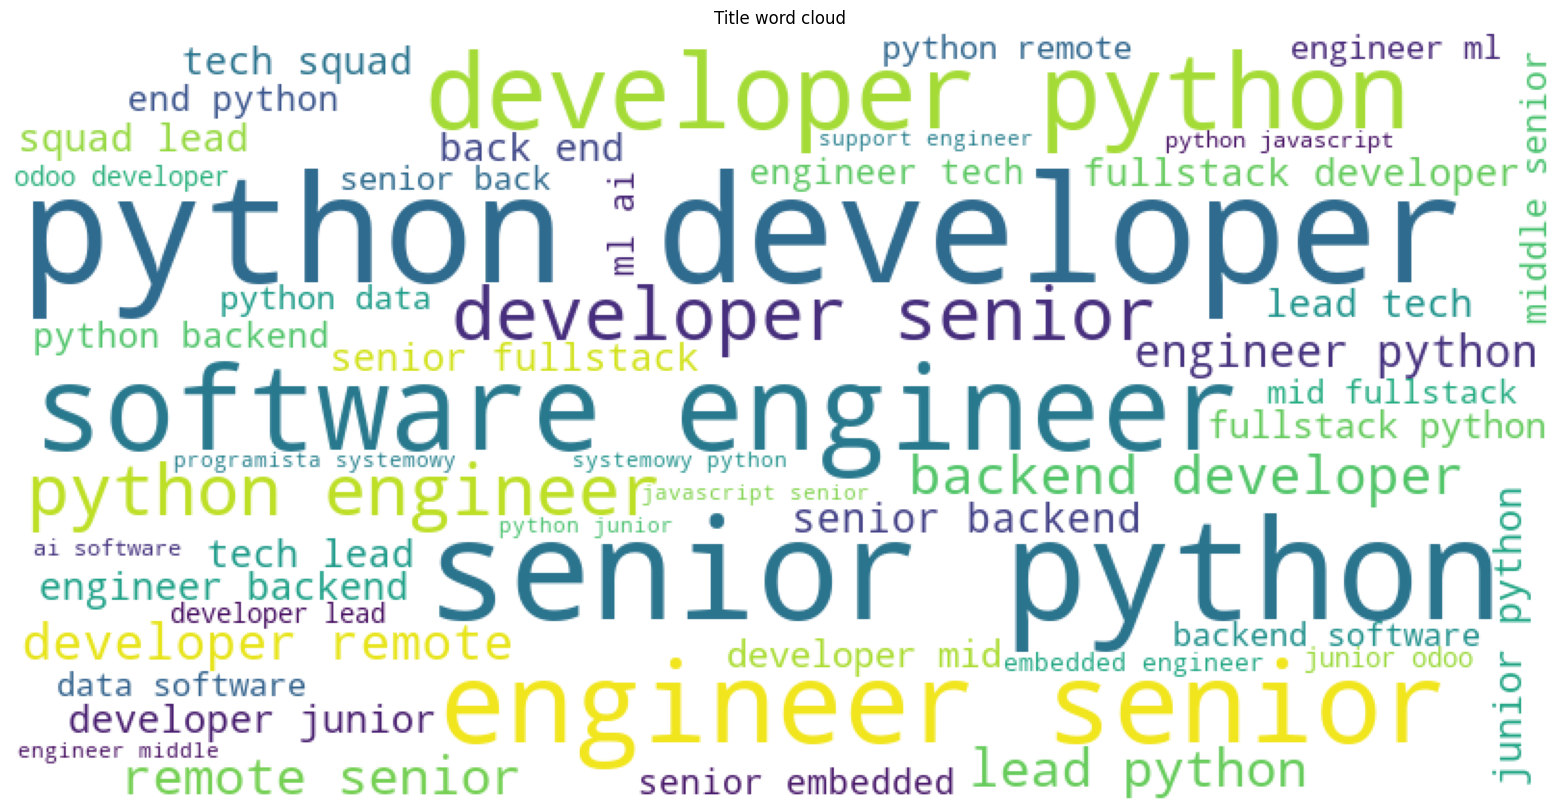

In [15]:
title_clean = df['title'].dropna()
len(title_clean)
title_string = ' '.join(title_clean.str.lower())
plt.figure(figsize=(20,10))
wc_title = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
                    width=800, height=400)
wc_title.generate(title_string)
plt.imshow(wc_title)
plt.axis('off')
plt.title('Title word cloud')

<Axes: >

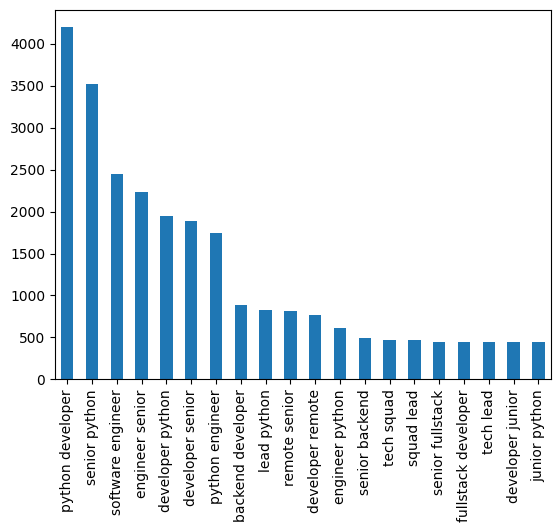

In [16]:
title_fc = pd.Series(wc_title.words_)
title_fc = np.ceil(title_fc * len(title_clean))
title_fc[:20].plot.bar()

### Companies

In [17]:
companies = df['company'].value_counts()
unique_companies = df['company'].unique()
print(companies.head(10))
print(len(unique_companies))

company
Sii Polska         216
Link Group         213
N-iX               207
Focal Systems      204
Avenga             126
Integral Vision    120
ASTEK Polska       114
Tooploox           108
Akamai             105
Adaptiq            102
Name: count, dtype: int64
124


<Axes: ylabel='count'>

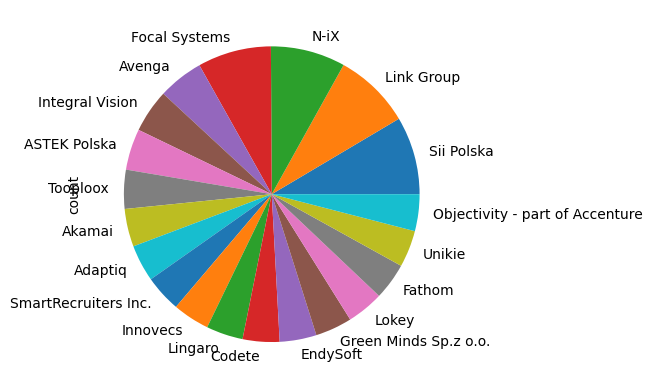

In [18]:
companies[:20].plot.pie()

### Description

1215


Text(0.5, 1.0, 'Desc word cloud')

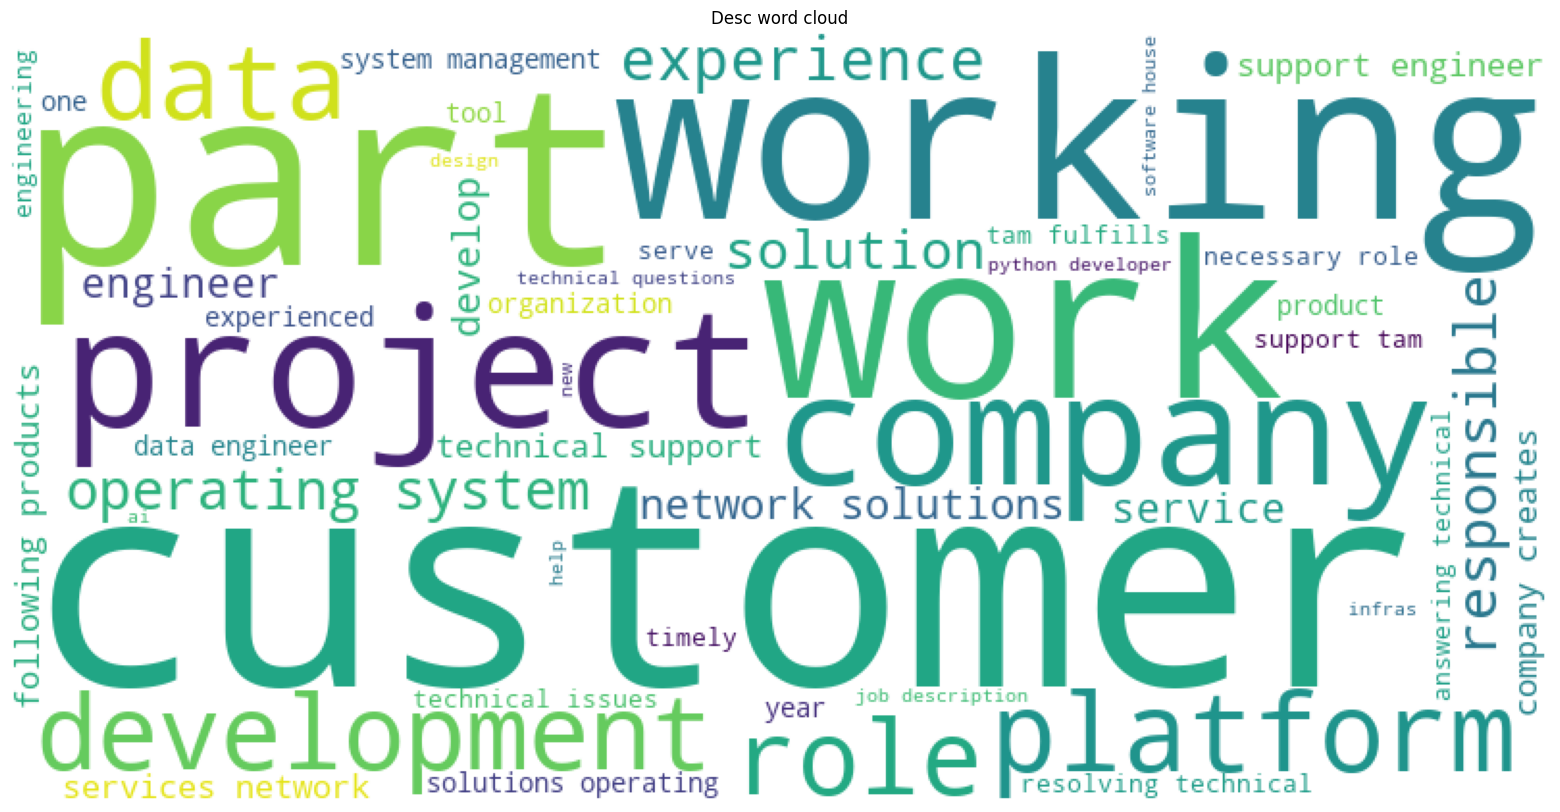

In [19]:
desc_clean = df['description'].dropna()
print(len(desc_clean))
desc_string = ' '.join(desc_clean.str.lower())
plt.figure(figsize=(20,10))
wc_desc = WordCloud(background_color="white", stopwords=stopwords_extra, max_words=50,
                    width=800, height=400)
wc_desc.generate(desc_string)
plt.imshow(wc_desc)
plt.axis('off')
plt.title('Desc word cloud')

### Date?

In [20]:
date_clean = df['date_added'].dropna()
print(len(date_clean))

2790


### Location

In [21]:
location_clean = df['location'].dropna()
len(location_clean)

540

In [22]:
location_clean.sample(10)

28                   Polska
16                   Polska
67          Opole, opolskie
2                    Polska
29    Warszawa, mazowieckie
21      Kraków, małopolskie
39                   Polska
27        Katowice, śląskie
19    Warszawa, mazowieckie
13                   Polska
Name: location, dtype: object

In [23]:
len(location_clean.unique())

23

In [24]:
location_clean.value_counts()

location
Kraków, małopolskie              150
Polska                           114
Warszawa, mazowieckie             96
Wrocław, dolnośląskie             45
Łódź, łódzkie                     24
Katowice, śląskie                 18
Gdańsk, pomorskie                 15
Lublin, lubelskie                 12
Poznań, wielkopolskie              9
Gdynia, pomorskie                  9
Bydgoszcz, kujawsko-pomorskie      6
Opole, opolskie                    6
Zabierzów, małopolskie             6
dolnośląskie                       3
Dąbrowa Górnicza, śląskie          3
Sienno, mazowieckie                3
świętokrzyskie                     3
Szczecin, zachodniopomorskie       3
Gorzów Wielkopolski, lubuskie      3
lubelskie                          3
mazowieckie                        3
Rzeszów, podkarpackie              3
Białystok, podlaskie               3
Name: count, dtype: int64

<Axes: ylabel='count'>

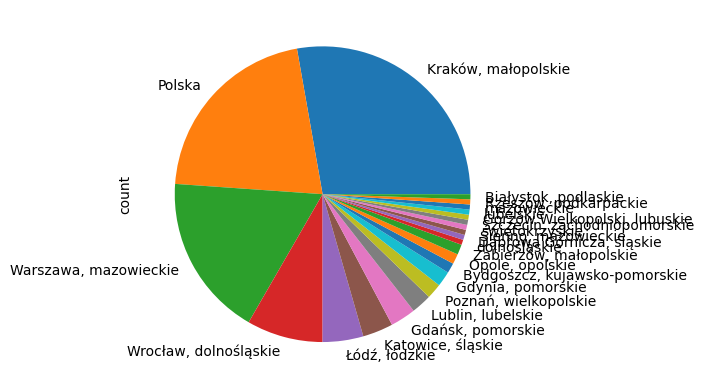

In [25]:
location_clean.value_counts().plot.pie()

### Salary?

In [26]:
salary_clean = df['salary'].dropna()
len(salary_clean)

3231

In [27]:
len(salary_clean.unique())

168